In [143]:
import pandas as pd
import os

In [144]:
data = pd.read_csv('sales/Sales_Data/Sales_April_2019.csv')
files = [file for file in os.listdir('sales/Sales_Data')]

# Create all monthe data into a single data
all_month_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('sales/Sales_Data/'+file)
    all_month_data = pd.concat([all_month_data, df])
all_month_data.to_csv('all_data.csv', index=False)

#### Read data from updated file

In [145]:
months_data = pd.read_csv('all_data.csv')
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Clean Up Data

#### Drop rows

In [146]:
nan_df = months_data[months_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


#### Dropint the NaN rows

In [147]:
months_data = months_data.dropna(how='all')
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Fiend "Or" and delete it

In [148]:
months_data = months_data[months_data['Order Date'].str[0:2] != 'Or']
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


Task2: Add month column

In [149]:
months_data['Month'] = months_data['Order Date'].str[0:2]
months_data['Month'] = months_data['Month'].astype('int32')
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Convert data to the correct formate

In [150]:
months_data['Quantity Ordered'] = pd.to_numeric(months_data['Quantity Ordered']) #int
months_data['Price Each'] = pd.to_numeric(months_data['Price Each']) #flot
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


# Add Sales column

In [151]:
months_data['Sales'] = months_data['Quantity Ordered'] * months_data['Price Each']
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


 Task 4: Add a city column

In [152]:
# months_data['Column'] = months_data['Purchase Address'].apply(lambda x: get_cities(x))
#months_data = months_data.drop(columns = 'Column') # Drop column
# months_data.head()

def get_cities(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

months_data['Cities'] = months_data['Purchase Address'].apply(lambda x: get_cities(x) + ' (' + get_state(x) + ')')
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


# Question 1: what was the best mont, and what was the earning of that month?

In [153]:
results = months_data.groupby('Month').sum()

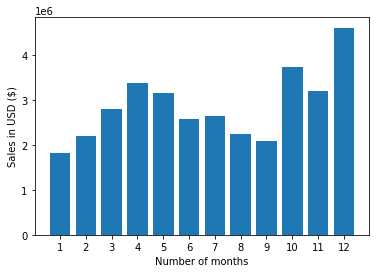

In [154]:
import matplotlib.pyplot as plt
months = range(1, 13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Number of months')
plt.show()

###Quention 2: What city had the highest number of sales

In [163]:
results = months_data.groupby('Cities').sum()
results

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Cities,,,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06,214264,442932
Austin (TX),11153,1.809874e+06,69829,1.819582e+06,141946,289060
Boston (MA),22528,3.637410e+06,141112,3.661642e+06,288225,590442
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06,214390,435155
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06,427444,866638
New York City (NY),27932,4.635371e+06,175741,4.664317e+06,357696,733598
Portland (ME),2750,4.471893e+05,17144,4.497583e+05,35211,72856
Portland (OR),11303,1.860558e+06,70621,1.870732e+06,144421,295533
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06,643265,1319477


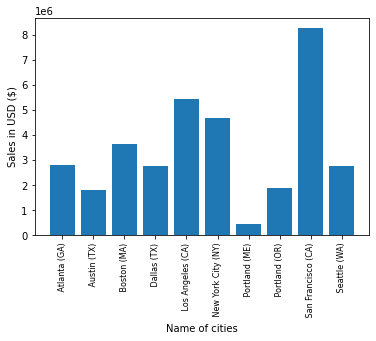

In [164]:
import matplotlib.pyplot as plt
cities = [cities for cities, df in months_data.groupby('Cities')]
plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Name of cities')
plt.show()

#### Question 3: What time should we need to show the advertisement to grow the sales

In [159]:
months_data['Order Date'] = pd.to_datetime(months_data['Order Date'])
months_data['Hour'] = months_data['Order Date'].dt.hour
months_data['Minute'] = months_data['Order Date'].dt.minute
months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,Cities,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


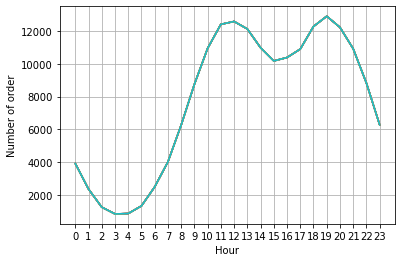

In [161]:
hours = [hour for hour, df in months_data.groupby('Hour')]
plt.plot(hours, months_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.grid()
plt.ylabel('Number of order')
plt.xlabel('Hour')
plt.show()

#### Question 4: Which product is sold most? and why do you think it's sold most?

## Most selling product

In [165]:
result = months_data.groupby('Product').sum()
result

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789


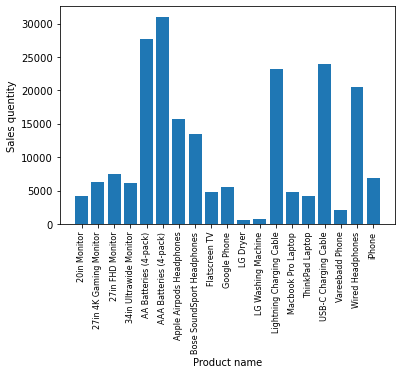

In [170]:
import matplotlib.pyplot as plt
products = [product for product, df in months_data.groupby('Product')]
plt.bar(products, result['Quantity Ordered'])
plt.xticks(products, rotation='vertical', size=8)
plt.ylabel('Sales quentity')
plt.xlabel('Product name')
plt.show()

#### Answer of why this product is sell most

<ipython-input-201-431e39ad3849>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


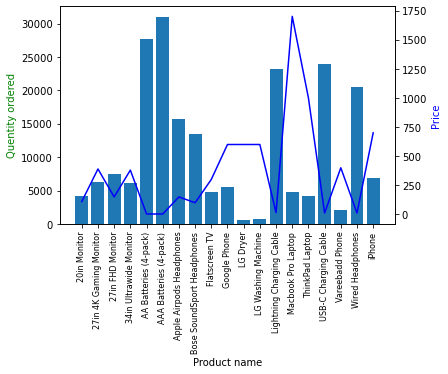

In [201]:
prices = months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, result['Quantity Ordered'])
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quentity ordered', color='g')
ax2.set_ylabel('Price', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()

#### Question 5: Which product is sold most togather?

In [96]:
df = months_data[months_data['Order ID'].duplicated(keep=False)]

#### Filter the same "Order ID"

In [97]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head(20)

<ipython-input-97-d53251595271>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"
129,176681,"Apple Airpods Headphones,ThinkPad Laptop"
138,176689,"Bose SoundSport Headphones,AAA Batteries (4-pack)"
189,176739,"34in Ultrawide Monitor,Google Phone"
225,176774,"Lightning Charging Cable,USB-C Charging Cable"
233,176781,"iPhone,Lightning Charging Cable"


In [102]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92
